In [1]:
#Tackle Noise with Error Correction

In [2]:
# Import necessary components from Qiskit
# !pip install qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [3]:
# Import noise model components from Qiskit Aer
from qiskit_aer.noise import NoiseModel, depolarizing_error

In [4]:
# Create a 3-qubit quantum circuit with a 3-bit classical register for measurement results
qc = QuantumCircuit(3, 3)


In [5]:
# Apply a Hadamard gate on the first qubit to create superposition
qc.h(0)

# Apply controlled-X (CNOT) gates to create entanglement between qubits
qc.cx(0, 1)  # Control on qubit 0, target on qubit 1
qc.cx(0, 2)  # Control on qubit 0, target on qubit 2

# Measure each qubit and store the result in the corresponding classical bit
qc.measure([0, 1, 2], [0, 1, 2])


In [6]:
# Define a noise model for the simulation
noise_model = NoiseModel()

In [7]:
# Add depolarizing noise for single-qubit gates (error probability of 1%)
depol_1q = depolarizing_error(0.01, 1)
# Add depolarizing noise for two-qubit gates (error probability of 2%)
depol_2q = depolarizing_error(0.02, 2)

# Apply the single-qubit depolarizing noise to specific gates ('u3', 'x', 'h')
noise_model.add_all_qubit_quantum_error(depol_1q, ['u3', 'x', 'h'])

# Apply the two-qubit depolarizing noise to CNOT gates ('cx')
noise_model.add_all_qubit_quantum_error(depol_2q, ['cx'])


In [8]:
# Set up the AerSimulator backend for running the circuit with the noise model
backend = AerSimulator()


In [9]:
# Execute the circuit on the simulator with the noise model, using 1024 shots
result_with_noise = backend.run(qc, noise_model=noise_model, shots=1024).result()


In [10]:
# Retrieve the raw counts from the noisy simulation
noisy_counts = result_with_noise.get_counts(qc)


In [11]:
# Simple mitigation technique: Scale the noisy counts by the expected noise factor (1 - 0.02)
mitigated_counts = {key: int(noisy_counts[key] * (1 - 0.02)) for key in noisy_counts}


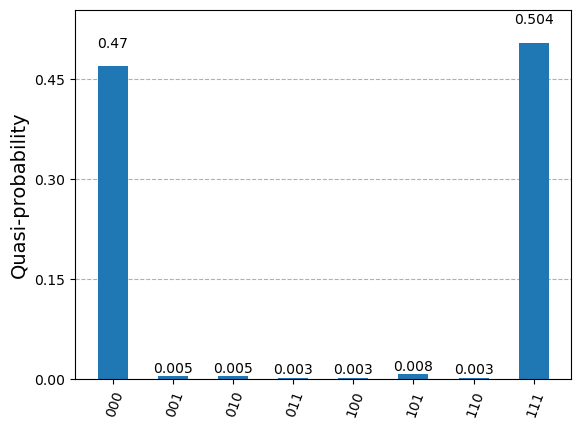

In [12]:
# Plot the mitigated results as a histogram
plot_histogram(mitigated_counts)


In [13]:
# Print the original (noisy) counts
print("Original counts:")
print(noisy_counts)


Original counts:
{'000': 481, '111': 516, '110': 3, '101': 8, '001': 5, '010': 5, '100': 3, '011': 3}


In [14]:

# Print the mitigated counts (after applying simple scaling)
print("Mitigated counts:")
print(mitigated_counts)

Mitigated counts:
{'000': 471.38, '111': 505.68, '110': 2.94, '101': 7.84, '001': 4.9, '010': 4.9, '100': 2.94, '011': 2.94}


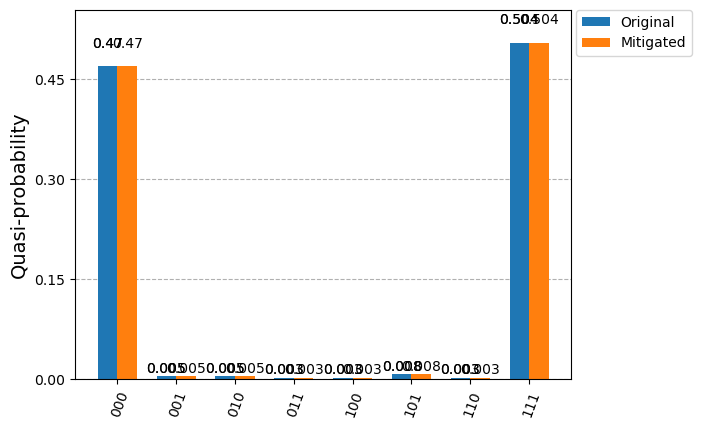

In [15]:
plot_histogram([noisy_counts, mitigated_counts], legend=['Original', 'Mitigated'])